# Plotting routine for the Sep22 Event

In [1]:
test = 'test'

In [2]:
%load_ext autoreload

%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pickle as p

import datetime as datetime
from datetime import timedelta
import seaborn as sns
import pandas as pd
import os
import copy as cp

import py3dcore_h4c as py3dcore_h4c

import py3dcore_h4c.fluxplot as fp

import warnings
warnings.filterwarnings('ignore')

import logging

logging.basicConfig(level=logging.INFO)
logging.getLogger("heliosat.spice").setLevel("WARNING")
logging.getLogger("heliosat.spacecraft").setLevel("WARNING")

#print(sns.__version__)

#### setting the times for py3DCORE_h4c

In [3]:
t_launch = datetime.datetime(2022, 9, 5, 18, 45, tzinfo=datetime.timezone.utc) # launch time assumed at CME impact at PSP at 14.72 Rs

t_s = datetime.datetime(2022, 9, 7, 8, tzinfo=datetime.timezone.utc) 
t_e = datetime.datetime(2022, 9, 8, 3, tzinfo=datetime.timezone.utc)

start = t_s + datetime.timedelta(hours=1)

t_fit = [
        datetime.datetime(2022, 9, 7, 9, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 7, 15, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 7, 20, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 8, 2, tzinfo=datetime.timezone.utc)
     ]

#t_fit = fp.equal_t_creator(start = start, n = 4, delta = 6)

#####2022 Sep 5: 3 solar radii at 17 UT (COR2 & LASCO FoV appearance)
# 2022 Sep 5: 15 solar radii at 18:45 UT (PSP)

#### loading the pickle files

In [4]:
t_fit

[datetime.datetime(2022, 9, 7, 9, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 7, 15, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 7, 20, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 8, 2, 0, tzinfo=datetime.timezone.utc)]

In [5]:
path = 'output/solo06092022_heeq_1024_restrP_3/'

filepath = fp.loadpickle(path, number = -1)

In [6]:
filepath[:-7]

'output/solo06092022_heeq_1024_restrP_3/09'

#### extracting parameters

In [5]:
res, allres, ind, meanparams = fp.get_params(filepath, give_mineps=True)

INFO:py3dcore_h4c.fluxplot:Retrieved the following parameters for the run with minimum epsilon:
INFO:py3dcore_h4c.fluxplot: --lon:  172.04
INFO:py3dcore_h4c.fluxplot: --lat:  -21.73
INFO:py3dcore_h4c.fluxplot: --inc:  4.07
INFO:py3dcore_h4c.fluxplot: --diameter 1 AU:  0.48
INFO:py3dcore_h4c.fluxplot: --aspect ratio:  1.29
INFO:py3dcore_h4c.fluxplot: --launch radius:  14.58
INFO:py3dcore_h4c.fluxplot: --launch speed:  1086.66
INFO:py3dcore_h4c.fluxplot: --t factor:  122.83
INFO:py3dcore_h4c.fluxplot: --expansion rate:  1.14
INFO:py3dcore_h4c.fluxplot: --magnetic field decay rate:  1.64
INFO:py3dcore_h4c.fluxplot: --magnetic field 1 AU:  43.30
INFO:py3dcore_h4c.fluxplot: --drag coefficient:  0.78
INFO:py3dcore_h4c.fluxplot: --sw background speed:  682.75


In [6]:
out = fp.get_ensemble_stats(filepath)

In [7]:
out.describe()

,lon,lat,inc,D1AU,delta,launch radius,launch speed,t factor,B1AU,gamma,vsw
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,172.789047,-20.968996,5.317990,0.435775,1.478697,15.027008,1481.486328,112.390656,36.826805,1.093474,630.816956
std,4.882709,4.488092,4.345445,0.031588,0.263533,0.534286,266.255157,27.676064,8.246074,0.413015,50.562969
min,157.494064,-29.956089,0.001406,0.343108,1.000628,14.001570,1000.068115,50.016071,9.407163,0.202732,409.386261
25%,169.609138,-24.157467,1.891583,0.413905,1.269414,14.581626,1263.906952,93.510096,30.784392,0.776106,604.079590
50%,172.701210,-21.140834,4.342335,0.435523,1.461018,15.056036,1472.353882,111.103722,37.579033,1.072614,641.642914
75%,175.867821,-17.759146,7.515204,0.459575,1.661660,15.468526,1690.569000,132.097923,43.515741,1.409288,669.390167
max,199.343094,-6.955032,25.087234,0.499819,2.466285,15.997504,1998.125488,209.505661,49.992947,1.997228,699.978271


#### loading and plotting the fitting results

INFO:py3dcore_h4c.fluxplot:Plotting run with mean parameters.
INFO:py3dcore_h4c.fitter.base:Using custom datafile: solo_2022sep.p


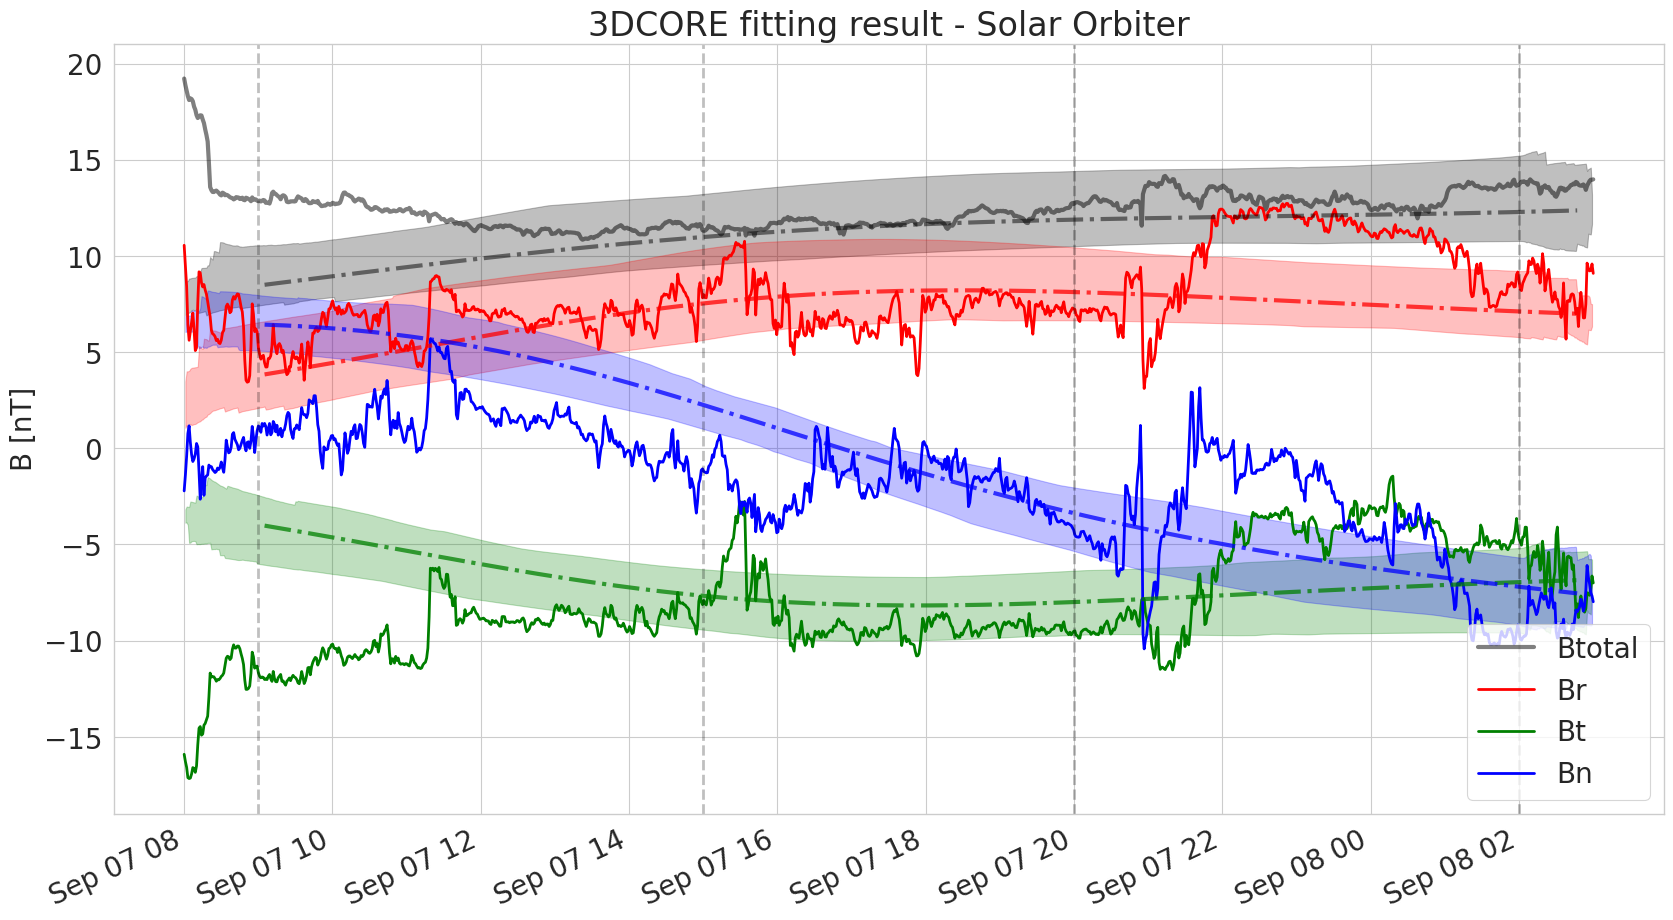

In [8]:
fp.fullinsitu(observer='solo', t_fit=t_fit, start=t_s, end=t_e, filepath=filepath, 
              custom_data='solo_2022sep.p', best=False, ensemble=True, mean=True, save_fig=True, legend=True, fixed=None)

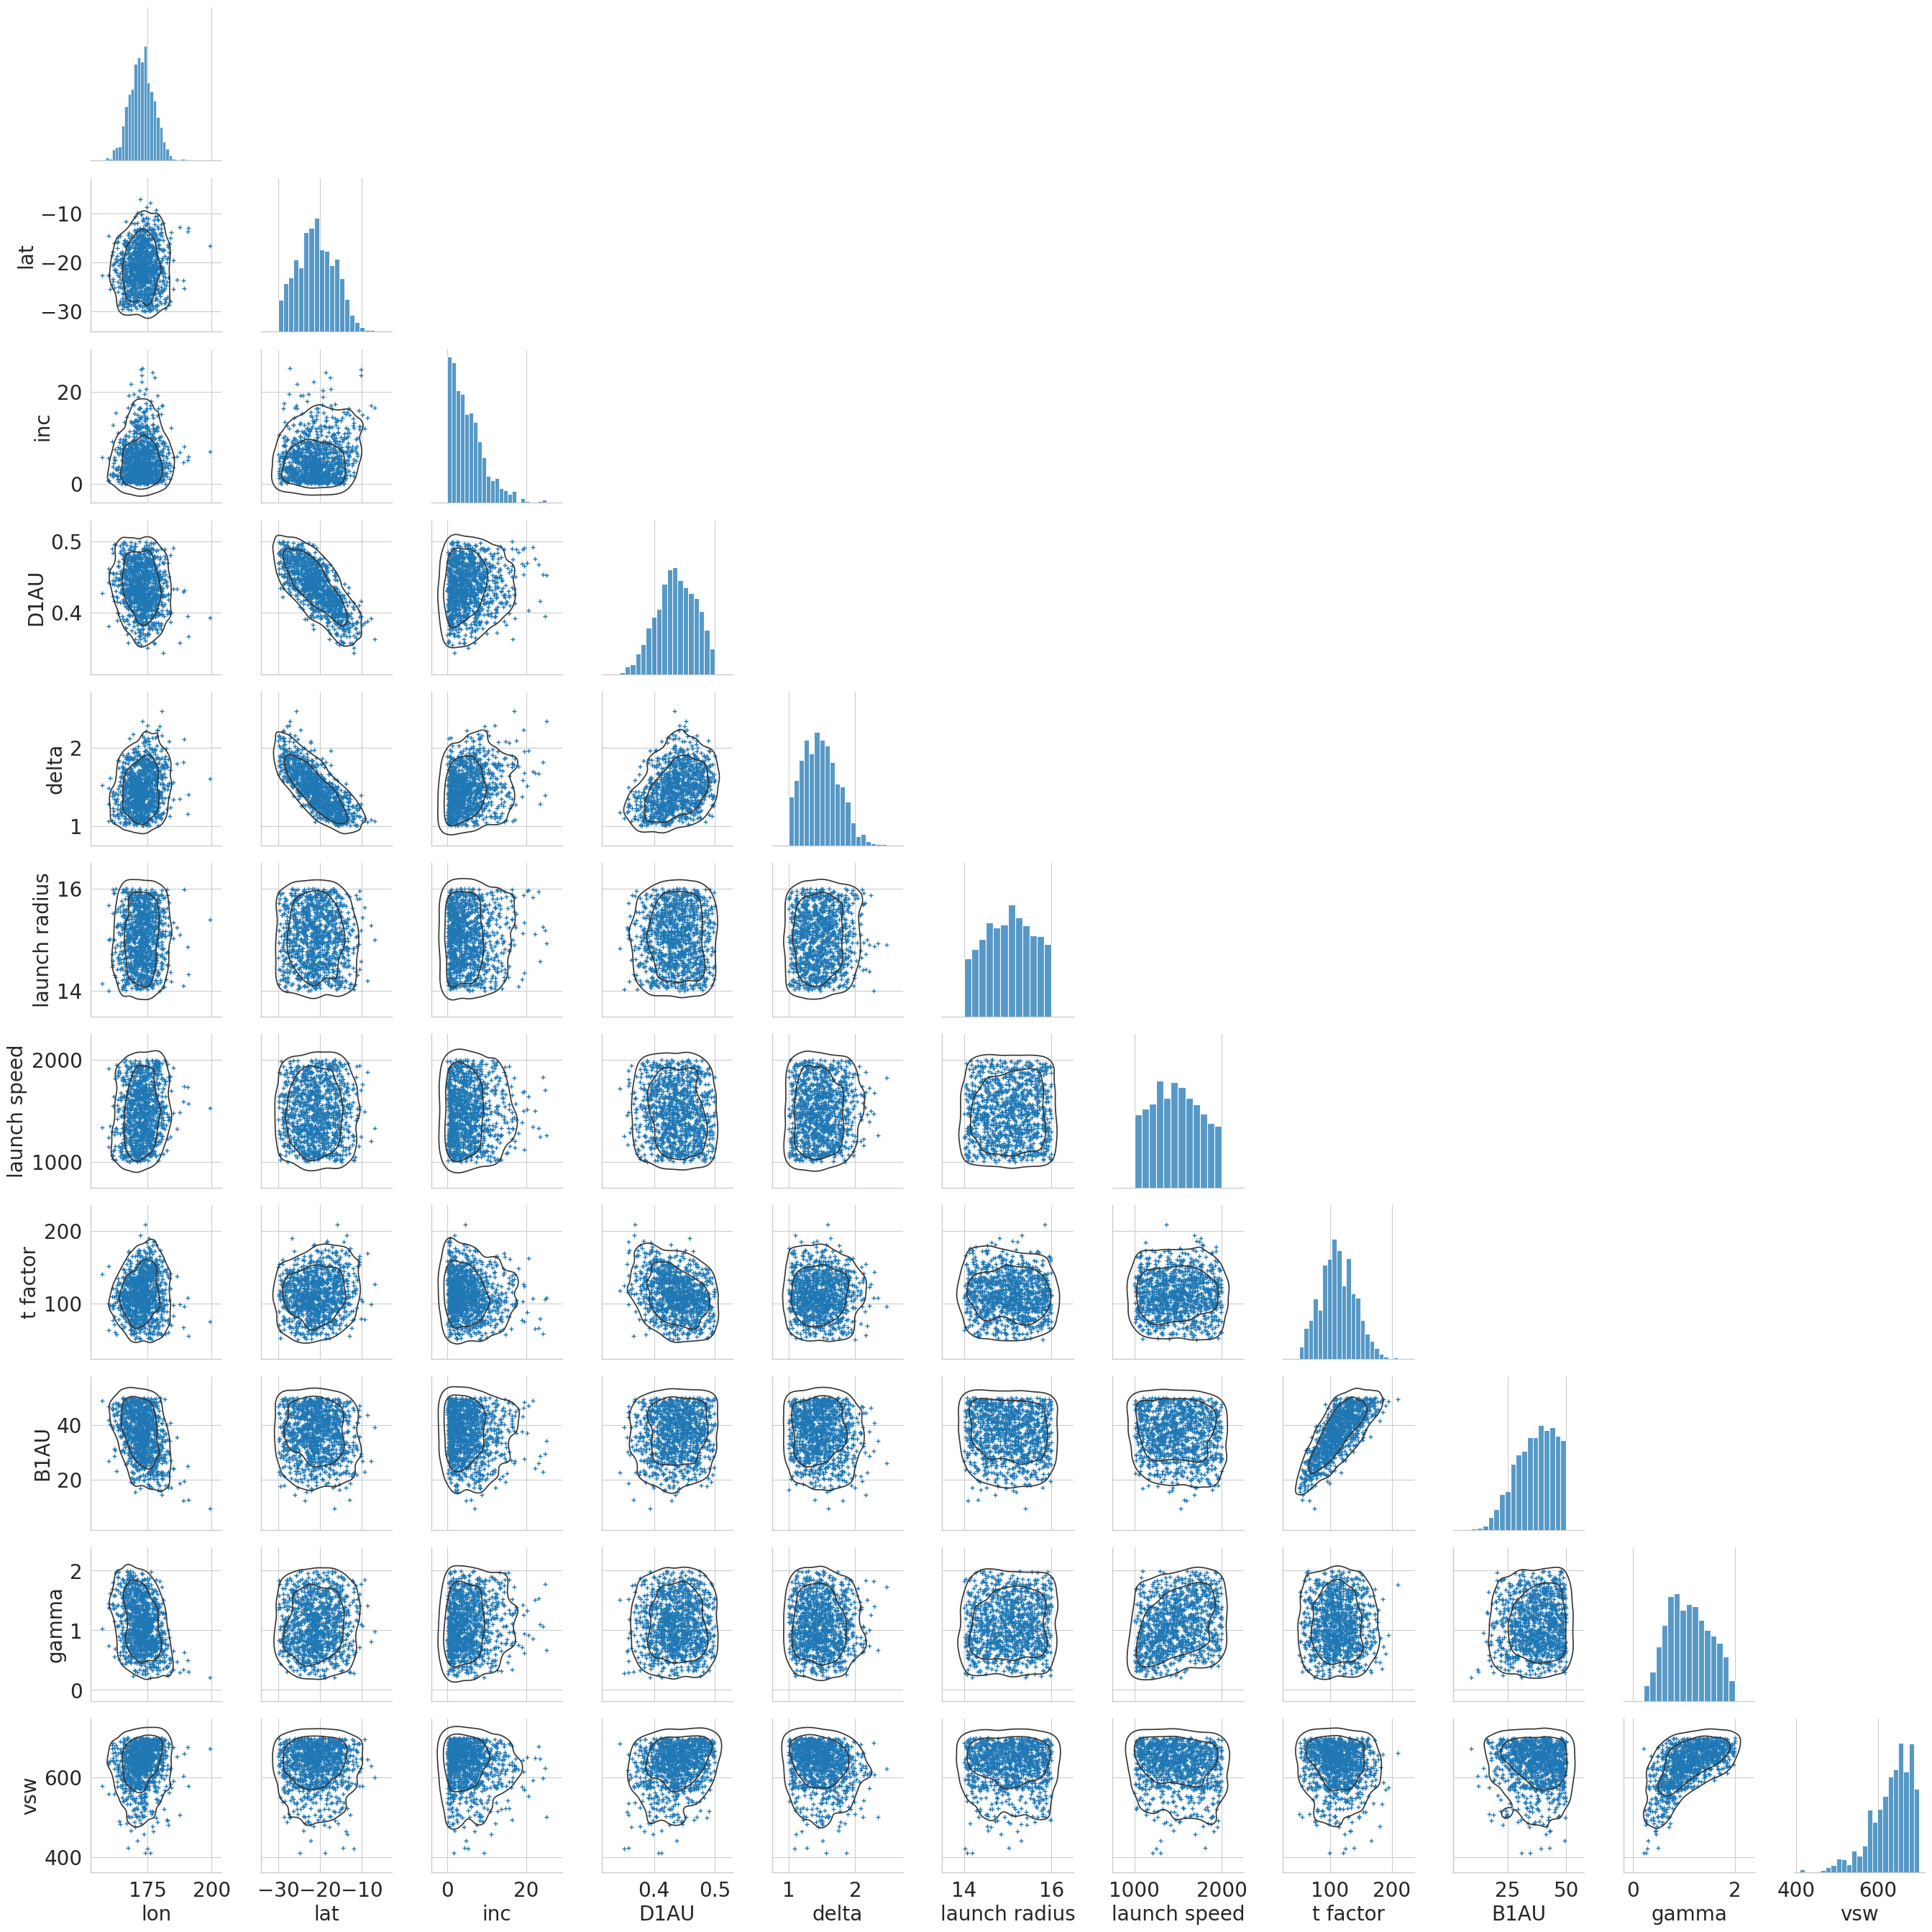

In [9]:
fp.scatterparams(filepath)

In [10]:
print(out['lon'].mean())
print(out['lon'].std())
print(out['launch radius'].std())
print(out['launch speed'].std())

172.78905
4.882709
0.53428584
266.25516


#### Plotting the fluxrope and spacecraft positions

INFO:sunpy:Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144


INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 59
INFO:py3dcore_h4c.fluxplot:Solar Orbiter - r: 0.684483, lon: 150.072220, lat: -3.730396, 
INFO:sunpy:Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144
INFO:py3dcore_h4c.fluxplot:Indices of date: 35
INFO:py3dcore_h4c.fluxplot:Solar Orbiter - r: 0.684483, lon: 150.072220, lat: -3.730396, 
INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft)


INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 59
INFO:py3dcore_h4c.fluxplot:Parker Solar Probe - r: 0.095459, lon: -122.155481, lat: -2.099772, 
INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft)
INFO:py3dcore_h4c.fluxplot:Indices of date: 35
INFO:py3dcore_h4c.fluxplot:Parker Solar Probe - r: 0.095459, lon: -122.155481, lat: -2.099772, 


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


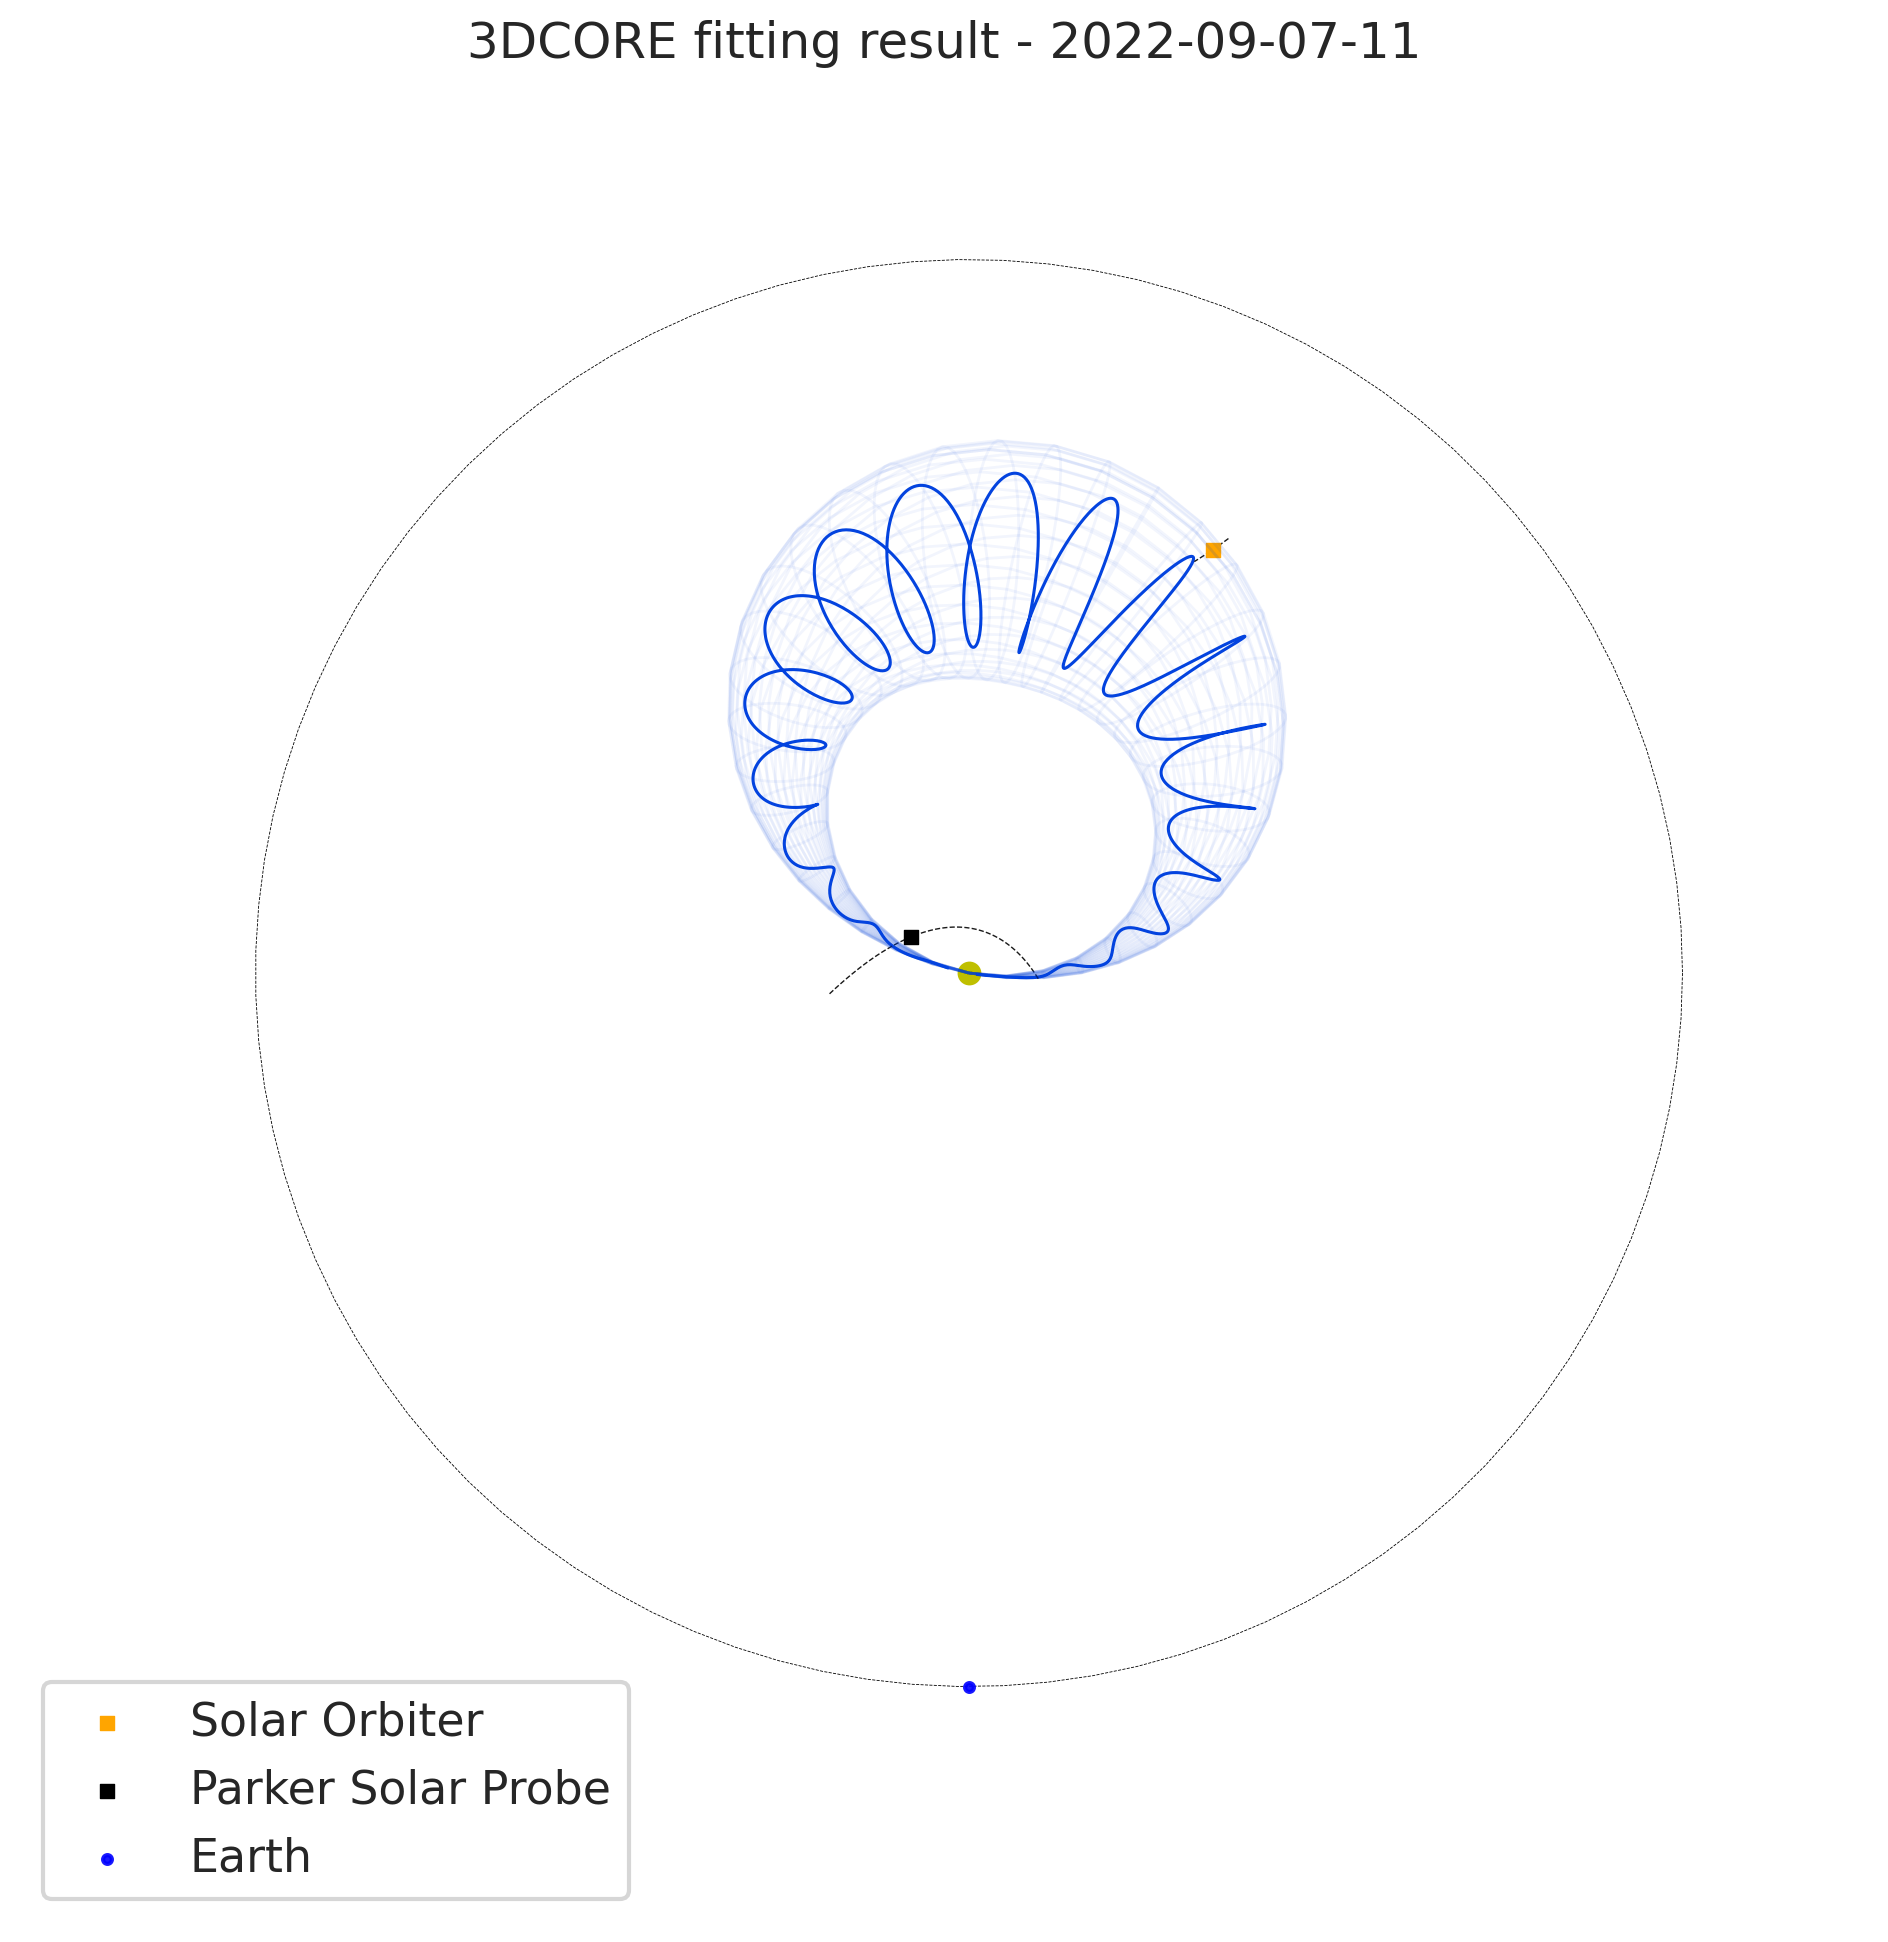

In [7]:
#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 7, 1)
tm1 =  t_launch + datetime.timedelta(days=1.7)
tm2 =  t_launch + datetime.timedelta(days=3.5)

fig = fp.full3d(spacecraftlist=['solo', 'psp'], planetlist =['Earth'],t = tm1, filepath = filepath)

### make fluxrope 3d movie

In [12]:
def make_frame(k):
    print(k)
    tm0 = datetime.datetime(2022, 9, 5, 19)
    t = tm0 + k*datetime.timedelta(hours=1)
    
    fig = fp.full3d(spacecraftlist=['solo', 'psp'], planetlist =['Earth'],
              t = t, filepath = filepath, save_fig = False)
    frmstr = '%05i' % (k) 
    plt.savefig(filepath[:-7] + 'movie_3d/'+frmstr+'.jpg',dpi=200)  
    return fig
    

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [13]:
os.system('ffmpeg -r 25 -i '+filepath[:-7]+'movie_3d/%05d.jpg -b 5000k -r 25 '+filepath[:-7]+'movie_3d/full_3d_movie.mp4 -y -loglevel quiet')

0

### plot fluxrope 3d multiview

INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 92
INFO:py3dcore_h4c.fluxplot:Parker Solar Probe - r: 0.067199, lon: 128.138680, lat: -2.261080, 
INFO:sunpy:Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144


INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 88
INFO:py3dcore_h4c.fluxplot:Solar Orbiter - r: 0.682322, lon: 150.161102, lat: -3.766634, 
INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 92
INFO:py3dcore_h4c.fluxplot:Parker Solar Probe - r: 0.067199, lon: 128.138680, lat: -2.261080, 
INFO:sunpy:Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144


INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 88
INFO:py3dcore_h4c.fluxplot:Solar Orbiter - r: 0.682322, lon: 150.161102, lat: -3.766634, 
INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 92
INFO:py3dcore_h4c.fluxplot:Parker Solar Probe - r: 0.067199, lon: 128.138680, lat: -2.261080, 
INFO:sunpy:Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144


INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 88
INFO:py3dcore_h4c.fluxplot:Solar Orbiter - r: 0.682322, lon: 150.161102, lat: -3.766634, 


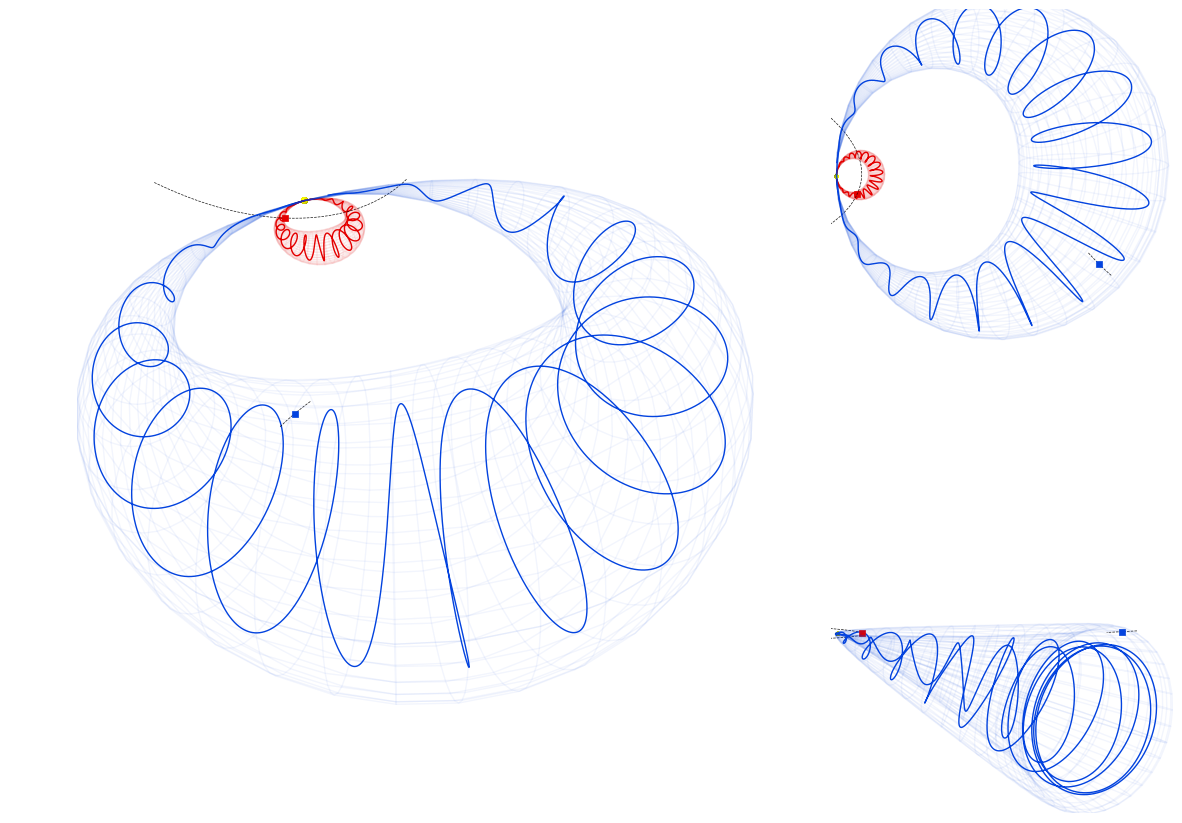

In [165]:
#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 7, 1)
tm1 =  t_launch + datetime.timedelta(days=1.7)
tm2 =  t_launch + datetime.timedelta(days=3.5)

fig = fp.full3d_multiview(t_launch = t_launch, filepath=filepath)

### make fluxrope 3d multiview movie

# Used for Debug

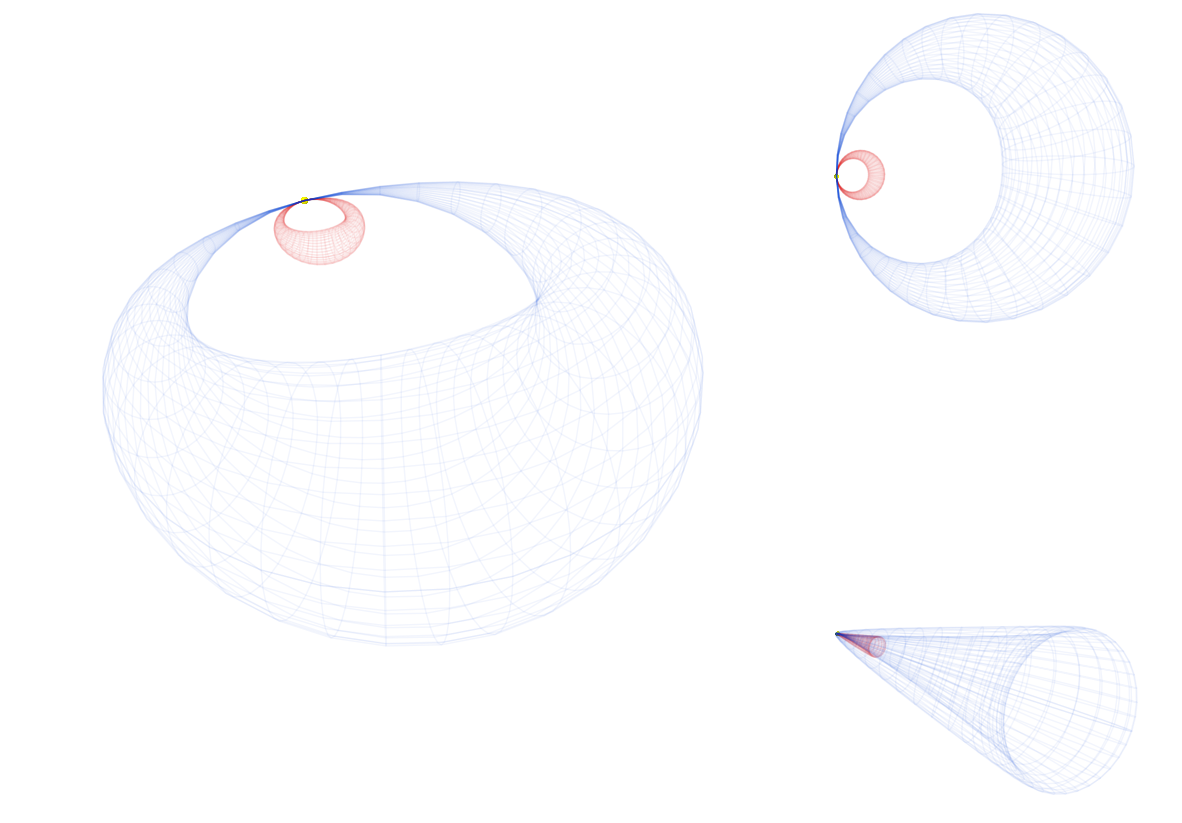

In [160]:
TP_A =  t_launch + datetime.timedelta(hours=2)
TP_B =  t_launch + datetime.timedelta(hours=40)


C_A = "xkcd:red"
C_B = "xkcd:blue"
    
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15, 11),dpi=100)

ax1 = plt.subplot2grid((2, 3), (0, 0),rowspan=2,colspan=2,projection='3d')  
ax2 = plt.subplot2grid((2, 3), (0, 2),projection='3d')  
ax3 = plt.subplot2grid((2, 3), (1, 2),projection='3d')  

model_obj = fp.returnmodel(filepath)


fp.plot_configure(ax1, view_azim=150, view_elev=25, view_radius=.2,light_source=True) #view_radius=.08

fp.plot_3dcore(ax1, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax1, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax1,0.31,-0.25,0.0,-0.2)


fp.plot_configure(ax2, view_azim=165-90, view_elev=90, view_radius=.08,light_source=True)
    
fp.plot_3dcore(ax2, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax2, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax2,0.26,-0.41,0.08,0.0)



fp.plot_configure(ax3, view_azim=65, view_elev=-5, view_radius=.01,light_source=True)
    
fp.plot_3dcore(ax3, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax3, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax3,0.26,-0.41,0.08,0.0)

